1. Gerekli kütüphaneler

In [1]:
# 🗃️ Veri okuma ve işleme
import pandas as pd  # Veri okuma, düzenleme ve DataFrame yapıları oluşturmak için

# 📊 Model performans değerlendirmesi ve doğrulama metrikleri
from sklearn.metrics import classification_report  # Precision, Recall, F1-score gibi performans metriklerini elde etmek için
from sklearn.metrics import confusion_matrix  # Gerçek ve tahmin değerlerini karşılaştırmak için karmaşıklık matrisi oluşturma
from sklearn.metrics import roc_auc_score  # ROC eğrisi altında kalan alanı (AUC) hesaplamak için
from sklearn.metrics import roc_curve  # ROC eğrisi verilerini hesaplamak için (TPR ve FPR)

# 📈 Grafiksel görselleştirme ve analiz için
import matplotlib.pyplot as plt  # Grafik ve görselleştirme oluşturmak için (örneğin ROC eğrisi, karmaşıklık matrisi)
import seaborn as sns  # Grafiklerin estetiğini artırmak ve gelişmiş grafik türlerini kullanmak için

# 🌟 Naive Bayes sınıflandırma modeli oluşturma
from sklearn.naive_bayes import GaussianNB  # Naive Bayes modelini oluşturmak ve eğitmek için (Gaussian dağılım varsayımı ile)

# ⚖️ Sınıf dengesizlik sorununu çözmek için SMOTE yöntemi
from imblearn.over_sampling import SMOTE  # Azınlık sınıfını çoğaltarak sınıf dengesizliğini gidermek için

# ⚙️ Özellik ölçeklendirme işlemleri
from sklearn.preprocessing import StandardScaler  # Özelliklerin ölçeklendirilmesi (standartlaştırılması) için

# 🧮 Sınıf dağılımını analiz etmek ve saymak için
from collections import Counter  # Verideki sınıfların dağılımını sayısal olarak göstermek için

2. Veriyi okuma

In [2]:
# Eğitim ve test verilerini oku
train_df = pd.read_csv("../datasets/normal/train_mental.csv")
test_df = pd.read_csv("../datasets/normal/test_mental.csv")

# Özellik ve hedef ayır (✅ doğru hedef sütunu kullanılıyor)
X_train = train_df.drop("support_needed", axis=1)
y_train = train_df["support_needed"]

X_test = test_df.drop("support_needed", axis=1)
y_test = test_df["support_needed"]

print("✅ Eğitim verisi:", X_train.shape)
print("✅ Test verisi:", X_test.shape)
print("🎯 Sınıf dağılımı (y_train):\n", y_train.value_counts())

✅ Eğitim verisi: (1007, 23)
✅ Test verisi: (252, 23)
🎯 Sınıf dağılımı (y_train):
 support_needed
0    528
1    479
Name: count, dtype: int64


3. SMOTE ile veri dengeleme

In [3]:
# Özellikleri ölçeklendir (özellikle Naive Bayes için önemli olabilir)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE uygulayarak sınıf dengesini sağla
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("🔁 SMOTE sonrası sınıf dağılımı:", Counter(y_train_balanced))

🔁 SMOTE sonrası sınıf dağılımı: Counter({0: 528, 1: 528})


4. Naive Bayes (GaussianNB)

In [4]:
# Modeli oluştur ve eğit
model = GaussianNB()
model.fit(X_train_balanced, y_train_balanced)

GaussianNB()

5. Tahmin

In [5]:
# Tahminler
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

6. Değerlendirme

📋 Sınıflandırma Raporu (Naive Bayes):

              precision    recall  f1-score   support

           0      0.805     0.811     0.808       132
           1      0.790     0.783     0.787       120

    accuracy                          0.798       252
   macro avg      0.797     0.797     0.797       252
weighted avg      0.798     0.798     0.798       252



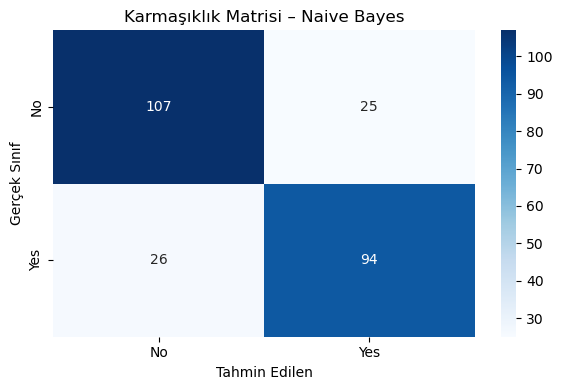

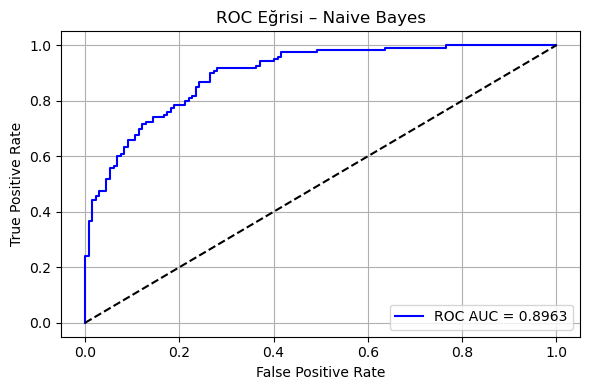

In [6]:
# 📋 Sınıflandırma raporu
print("📋 Sınıflandırma Raporu (Naive Bayes):\n")
report = classification_report(y_test, y_pred, digits=3)  # 3 basamak hassasiyeti
print(report)

# 🔍 Karmaşıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Karmaşıklık Matrisi – Naive Bayes")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()

# 🌈 ROC Eğrisi
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}", color="blue")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi – Naive Bayes")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

7. Model kaydı

In [7]:
import joblib

# model.save("../saved_model/normal/mental_nb_model.keras")
joblib.dump(model, "../saved_model/normal/mental_nb_model.pkl")

print("💾 Model başarıyla kaydedildi:")
print("- mental_nb_model.pkl")

💾 Model başarıyla kaydedildi:
- mental_nb_model.pkl
